In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data_df = pd.read_csv('reduced.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 16 columns):
PID           1144 non-null int64
PCL.score     975 non-null float64
PHQ.score     988 non-null float64
SDS.score     975 non-null float64
Days.Since    1144 non-null float64
Reexp1        651 non-null float64
Reexp2        649 non-null float64
Avoid1        650 non-null float64
Avoid2        651 non-null float64
NACM1         651 non-null float64
NACM2         649 non-null float64
AAR1          650 non-null float64
AAR2          650 non-null float64
Sleep         650 non-null float64
Pain          646 non-null float64
HR            103 non-null float64
dtypes: float64(15), int64(1)
memory usage: 143.1 KB


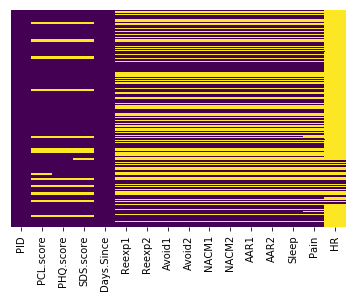

In [4]:
#To check amount of missing data
sns.heatmap(data_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#drop HR column
data_df.drop(['HR'] , axis = 1 , inplace = True)

In [6]:
data_df.describe()

,PID,PCL.score,PHQ.score,SDS.score,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,NACM2,AAR1,AAR2,Sleep,Pain
count,1144.000000,975.000000,988.000000,975.000000,1144.000000,651.000000,649.000000,650.000000,651.000000,651.000000,649.000000,650.000000,650.000000,650.000000,646.000000
mean,280.477273,17.026667,7.381579,15.453333,25.461538,0.803405,0.948254,0.650628,0.693945,0.824770,0.790293,0.617756,1.007333,1.486167,4.166318
std,44.625097,16.244074,6.190913,9.492114,14.790112,0.875152,0.962630,0.831002,0.832606,0.927792,0.938742,0.844281,0.999821,1.098524,2.759724
min,202.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,5.000000,2.000000,7.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,2.000000
50%,282.500000,11.000000,6.500000,15.000000,25.500000,0.500000,1.000000,0.333333,0.375000,0.666667,0.500000,0.250000,1.000000,1.250000,4.000000
75%,318.250000,27.000000,11.250000,24.000000,37.500000,1.333333,1.500000,1.000000,1.000000,1.250000,1.250000,1.000000,1.500000,2.250000,6.250000
max,352.000000,64.000000,24.000000,30.000000,48.500000,4.000000,4.000000,4.000000,3.750000,4.000000,4.000000,4.000000,4.000000,4.000000,10.000000


In [7]:
#Adding Threshold column based on ground truth values
data_df['Threshold'] = 0

In [8]:
#replace threhold value with 1 if PCL.score is >10, replace with 0 if PCL.score <= 10 or PCL.score is nan(ex for PID 208) 
data_df.loc[data_df['PCL.score'] >= 11, 'Threshold'] = 1

In [9]:
#check 
data_df[['PCL.score','Threshold']]
data_df['PCL.score'].unique()

array([ 25.,   6.,  27.,   1.,  nan,   9.,  40.,  34.,   3.,   5.,   2.,
        23.,   7.,  64.,  10.,  19.,  13.,  39.,  20.,  54.,   8.,  11.,
        58.,  28.,  29.,  26.,   4.,  32.,   0.,  45.,  14.,  24.,  31.,
        38.,  12.,  51.,  53.,  16.])

Preprocessing steps to deal with missing data in columns Reexp1 through Pain:
1. Aggregated the dataset by grouping each of the four rows.
2. To deal with missing values, calculated average of each column for each of the PID. Interpolated Nan values of that column for that PID with the calculated average.
3. Rounded off all decimal values to integer for the columns [Days.Since through Pain]

Note:
Range of columns Reexp1 through Sleep is 0(least)-4(extreme)
Range of column Pain is 0-10

In [10]:
#Missing value interpolation
for j in [ 'Reexp1', 'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2','AAR1', 'AAR2', 'Sleep', 'Pain']:
    for i in data_df['PID'].unique():
        #print(i)
        v = data_df.loc[data_df['PID'] == i, j].sum()
        c = data_df.loc[data_df['PID'] == i, j].count()
        #print(v)
        #print(c)
        #divide the sum by total non-nan values
        replace_value = v/c
        #print(replace_value)
        data_df.loc[(data_df['PID'] == i) ,j] = data_df.fillna(replace_value)

In [11]:
data_df.head(5)

,PID,PCL.score,PHQ.score,SDS.score,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,NACM2,AAR1,AAR2,Sleep,Pain,Threshold
0,202,25.0,7.0,0.0,2.0,2.0,2.500000,3.00,3.000,2.00,0.00,0.0,0.500000,0.50,5.500000,1
1,202,25.0,7.0,0.0,5.5,1.0,1.250000,0.75,1.125,1.50,0.75,0.0,0.000000,0.75,4.000000,1
2,202,25.0,7.0,0.0,9.5,0.0,0.500000,0.75,1.000,0.75,0.00,0.0,0.250000,1.25,2.750000,1
3,202,25.0,7.0,0.0,13.5,0.0,0.333333,0.00,0.000,0.00,0.00,0.0,0.333333,0.00,1.666667,1
4,202,25.0,7.0,0.0,17.5,0.0,0.000000,0.00,0.000,0.00,0.00,0.0,0.000000,0.00,0.666667,1


In [12]:
#check unique values of each column
for j in data_df.columns:
    print(j, data_df[j].unique())

data_df.columns

PID [202 203 204 205 206 208 213 215 216 219 221 223 226 227 229 232 233 235
 237 239 240 241 245 246 249 250 251 252 256 257 260 261 262 263 265 267
 268 270 271 274 275 278 280 282 283 285 287 288 289 290 291 292 293 294
 296 298 300 305 306 307 308 312 313 316 317 318 319 321 326 327 330 332
 333 334 336 337 338 339 341 343 344 345 346 347 348 349 351 352]
PCL.score [ 25.   6.  27.   1.  nan   9.  40.  34.   3.   5.   2.  23.   7.  64.  10.
  19.  13.  39.  20.  54.   8.  11.  58.  28.  29.  26.   4.  32.   0.  45.
  14.  24.  31.  38.  12.  51.  53.  16.]
PHQ.score [  7.   6.  11.   0.   9.  nan  14.  12.   1.   4.  13.  24.   3.   2.  15.
  21.   5.  10.  16.   8.]
SDS.score [  0.  20.  15.  13.  nan   5.  17.  11.  10.   6.  22.  16.  14.  26.  21.
  28.  18.  30.  25.   1.   2.  29.  12.   4.  23.   7.  24.]
Days.Since [  2.    5.5   9.5  13.5  17.5  21.5  25.5  29.5  33.5  37.5  41.5  45.5
  48.5]
Reexp1 [ 2.          1.          0.          0.33333333  0.44791667  0.66666667
 

Index(['PID', 'PCL.score', 'PHQ.score', 'SDS.score', 'Days.Since', 'Reexp1',
       'Reexp2', 'Avoid1', 'Avoid2', 'NACM1', 'NACM2', 'AAR1', 'AAR2', 'Sleep',
       'Pain', 'Threshold'],
      dtype='object')

In [13]:
data_df.to_csv('processed.csv',index=False)